# Практика 6: Атака по переносу (Transfer Attack) на модели ИИ
По предмету: Анализ защищенности систем искусственного интеллекта

Выполнил студент 2 курса группы ББМО-02-23

Васильев Григорий Максимович

**Цель задания:**

Изучить концепцию атаки по переносу, где противоречивые примеры, созданные для одной модели, используются для атаки на другую модель. Это задание требует создания нескольких моделей, генерации противоречивых примеров для одной модели и проверки их на другой модели.

**Задачи:**

* Загрузить несколько моделей, обученных на датасете MNIST.
* Изучить теоретические основы атаки по переносу.
* Реализовать атаку FGSM на одну модель и проверить, как противоречивые примеры влияют на другую модель.
* Оценить точность обеих моделей на противоречивых примерах и проанализировать переносимость атак.

**Шаги выполнения:**

## Шаг 1: Загрузка и создание двух различных моделей
Создаем две модели на датасете MNIST: одну простую полносвязную сеть и одну свёрточную нейронную сеть (CNN)

**Загрузка нужных библиотек:**

Репозитории со всеми работами находится по ссылке: https://github.com/Archangel15520/AZSII-REPO/blob/main/README.md

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

**Загрузка датасета MNIST и нормализация данных:**

In [2]:
# Загрузка датасета MNIST:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Нормализация данных:
train_images = train_images / 255.0
test_images = test_images / 255.0
# Преобразование меток в one-hot encoding:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Создание простой полносвязной модели на датасете MNIST с проверкой точности и сохранением:**

In [3]:
# Создание простой полносвязной модели
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели
model1.fit(train_images, train_labels, epochs=5)

# Проверка точности модели на обычных данных
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f'Проверка точность на чистых изображениях: {test_acc}')

# Сохранение модели
model1.save('mnist_model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8797 - loss: 0.4215
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9639 - loss: 0.1239
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9750 - loss: 0.0790
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9819 - loss: 0.0585
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0433
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0862


Проверка точность на чистых изображениях: 0.9763000011444092


**Создание свёрточной нейронной сети на датасете MNIST с проверкой точности и сохранением:**

In [4]:
# Создание модели свёрточной нейронной сети
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели
model2.fit(train_images, train_labels, epochs=5)

# Проверка точности модели на обычных данных
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f'Проверка точность на чистых изображениях: {test_acc}')

# Сохранение модели
model2.save('mnist_model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9104 - loss: 0.2971
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9830 - loss: 0.0542
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9890 - loss: 0.0345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9931 - loss: 0.0225
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9948 - loss: 0.0156
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0654


Проверка точность на чистых изображениях: 0.9857000112533569


## Шаг 2: Теория атаки по переносу

Атака по переносу — это метод, при котором противоречивые примеры, созданные для одной модели, применяются к другой модели. Это возможно, потому что модели часто имеют схожие слабости и могут совершать одинаковые ошибки на определенных данных, даже если они обучены на разных архитектурах.

В этом задании мы создадим противоречивые примеры для первой модели с помощью FGSM и затем проверим, насколько эти примеры могут атаковать вторую модель.

## Шаг 3: Реализация атаки FGSM на первую модель (полносвязную)

Применим атаку FGSM (Fast Gradient Sign Method) к первой модели, чтобы создать противоречивые примеры:

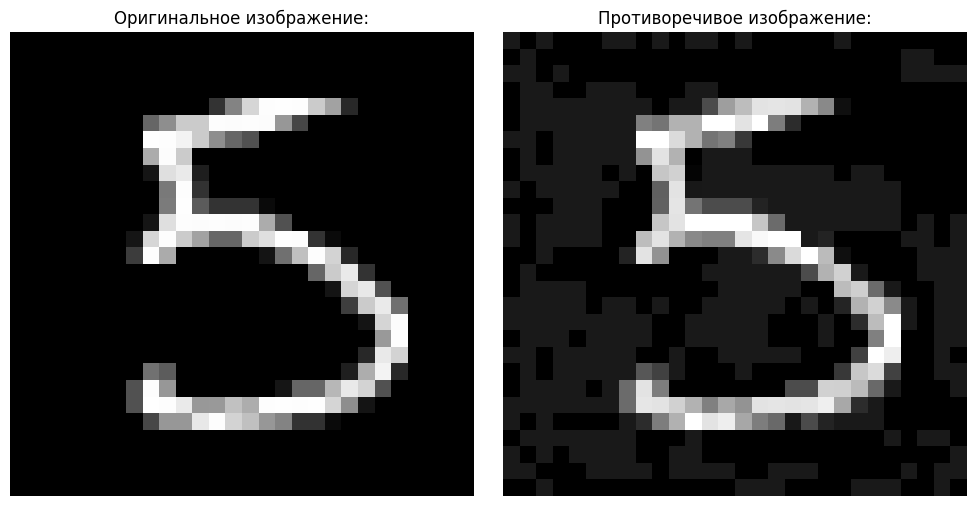

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Функция для реализации FGSM атаки
def fgsm_attack(image, epsilon, gradient):
    # Применение знака градиента к изображению
    perturbed_image = image + epsilon * np.sign(gradient)
    # Обрезка значений, чтобы они оставались в пределах [0, 1]
    perturbed_image = np.clip(perturbed_image, 0, 1)
    return perturbed_image

# Функция для генерации противоречивых примеров
def generate_adversarial_example(model, images, labels, epsilon):
    adversarial_images = []
    for i in range(len(images)):
        # Подготовка изображения и метки
        image = tf.convert_to_tensor(images[i].reshape((1, 28, 28, 1)))
        label = labels[i]
        if len(label.shape) > 1 and label.shape[1] > 1:
            label = np.argmax(label)
        label = tf.convert_to_tensor(label)

        # Вычисление градиента
        with tf.GradientTape() as tape:
            tape.watch(image)
            prediction = model(image)
            loss = tf.keras.losses.categorical_crossentropy(label[None], prediction)
        gradient = tape.gradient(loss, image)

        # Применение FGSM
        adversarial_image = fgsm_attack(image.numpy(), epsilon, gradient.numpy())
        adversarial_images.append(np.reshape(adversarial_image, (28, 28, 1)))

    return np.array(adversarial_images)

# Значение epsilon для атаки
epsilon = 0.1

# Создание противоречивых изображений для простой полносвязной модели
adversarial_example = generate_adversarial_example(model1, test_images, test_labels, epsilon)

# Настройка визуализации оригинального и противоречивого изображения
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Оригинальное изображение
axes[0].imshow(test_images[15], cmap="gray")
axes[0].set_title("Оригинальное изображение:")
axes[0].axis("off")

# Противоречивое изображение
axes[1].imshow(adversarial_example[15].reshape(28, 28), cmap="gray")
axes[1].set_title("Противоречивое изображение:")
axes[1].axis("off")

# Отображение графика
plt.tight_layout()
plt.show()


## Шаг 4: Оценка противоречивых примеров на обеих моделях

Теперь мы проверим, как эти противоречивые примеры влияют на обе модели — первую, для которой они были созданы, и вторую, которая их не видела.

In [ ]:
# Оценка полносвязной модели на противоречивых примерах
adversarial_loss1, adversarial_acc1 = model1.evaluate(
    adversarial_example.reshape(-1, 28, 28),
    test_labels,
    verbose=0
)

# Оценка свёрточной модели на противоречивых примерах
adversarial_loss2, adversarial_acc2 = model2.evaluate(
    adversarial_example.reshape(-1, 28, 28),
    test_labels,
    verbose=0
)

# Вывод результатов
print(f"Точность полносвязной модели: {adversarial_acc1:.4f}")
print(f"Точность свёрточной модели: {adversarial_acc2:.4f}")


Точность полносвязной модели: 0.0985
Точность свёрточной модели: 0.9662


**Вывод:**

Результаты показывают, что атака FGSM переносится между моделями крайне неэффективно. Полносвязная модель оказалась значительно более уязвимой, с точностью, снизившейся до 9.85%, что свидетельствует о практически полной неспособности модели корректно классифицировать противоречивые примеры. В то же время свёрточная модель продемонстрировала высокую устойчивость к атаке, сохранив точность на уровне 96.62%.

## Шаг 5: Реализация атаки FGSM на вторую модель (свёрточную)

Применим атаку FGSM (Fast Gradient Sign Method) к первой модели, чтобы создать противоречивые примеры:

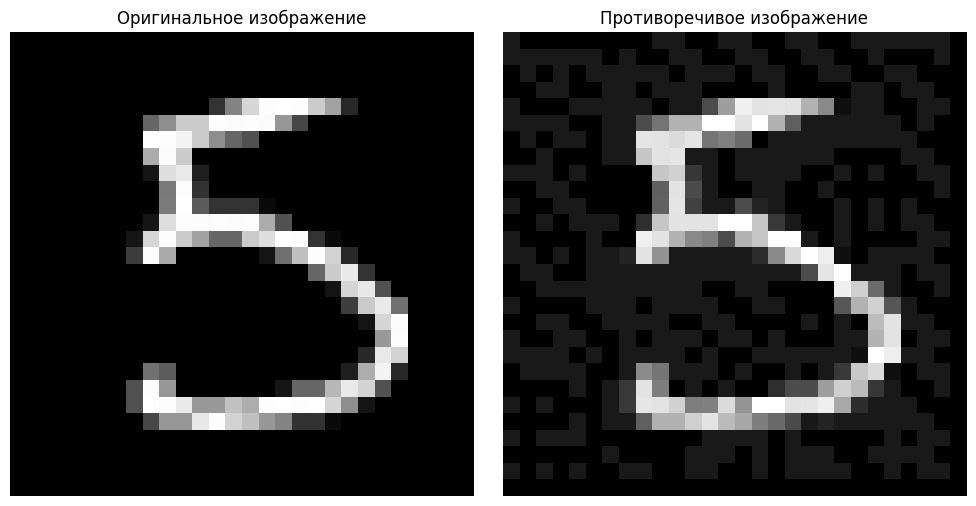

In [ ]:
# Создание противоречивых изображений для свёрточной модели
adversarial_example1 = generate_adversarial_example(model2, test_images, test_labels, epsilon)

import matplotlib.pyplot as plt

# Визуализация оригинального и противоречивого изображения
fig = plt.figure(figsize=(10, 5))

# Оригинальное изображение
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(test_images[15], cmap="gray")
ax1.set_title("Оригинальное изображение")
ax1.axis("off")

# Противоречивое изображение
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(adversarial_example1[15].reshape(28, 28), cmap="gray")
ax2.set_title("Противоречивое изображение")
ax2.axis("off")

# Отображение графика
plt.tight_layout()
plt.show()


## Шаг 6: Оценка противоречивых примеров на обеих моделях

In [ ]:
# Оценка полносвязной модели на противоречивых примерах
adversarial_loss3, adversarial_acc3 = model1.evaluate(
    adversarial_example1.reshape(-1, 28, 28),
    test_labels,
    verbose=0
)

# Оценка свёрточной модели на противоречивых примерах
adversarial_loss4, adversarial_acc4 = model2.evaluate(
    adversarial_example1.reshape(-1, 28, 28),
    test_labels,
    verbose=0
)

# Вывод результатов
print(f"Точность полносвязной модели на противоречивых примерах: {adversarial_acc3:.4f}")
print(f"Точность свёрточной модели на противоречивых примерах: {adversarial_acc4:.4f}")


Точность полносвязной модели на противоречивых примерах: 0.9318
Точность свёрточной модели на противоречивых примерах: 0.6843


**Вывод:**

Результаты показывают, что атака FGSM переносится между моделями с разной эффективностью. Полносвязная модель продемонстрировала высокую устойчивость к противоречивым примерам, снизив свою точность лишь до 93.18%, что составляет незначительное снижение по сравнению с исходными результатами.

Однако свёрточная модель оказалась более уязвимой: её точность на противоречивых примерах упала до 68.43%. Эти данные подчеркивают, что атака FGSM оказывает более значительное влияние на свёрточные модели, в то время как полносвязные модели демонстрируют большую устойчивость к этой форме атаки. Это может быть связано с различиями в архитектуре моделей и тем, как они обрабатывают информацию.